# Project: Wrangling and Analyze Data

In [2]:
# import libraries and packages

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import requests
import json
import tweepy
import io
import time
import datetime
import sklearn
import os

## Data Gathering
In the cell below, gather **all** three pieces of data for this project and load them in the notebook. **Note:** the methods required to gather each data are different.
1. Directly download the WeRateDogs Twitter archive data (twitter_archive_enhanced.csv)

In [3]:
# gathering the data
df=pd.read_csv('twitter-archive-enhanced.csv')


2. Use the Requests library to download the tweet image prediction (image_predictions.tsv)

In [4]:
# URL downloaded programmatically and opened
url='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
r=requests.get(url, allow_redirects=True)

#opening the tsv and saving it as a file
with open('image_predictions.tsv', 'wb') as file:
    file.write(r.content)

In [5]:
# read tsv file

df2= pd.read_csv('image_predictions.tsv', sep='\t')

3. Use the Tweepy library to query additional data via the Twitter API (tweet_json.txt)

In [6]:
from tweepy import OAuthHandler
from timeit import default_timer as timer

In [7]:
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True)


In [8]:
# NOTE TO REVIEWER: this student had mobile verification issues so the following
# Twitter API code was sent to this student from a Udacity instructor

In [9]:
# Tweet IDs for which to gather additional data via Twitter's API
tweet_ids = df.tweet_id.values
len(tweet_ids)

2356

In [10]:
# Query Twitter's API for JSON data for each tweet ID in the Twitter archive
count = 0
fails_dict = {}
start = timer()
# Save each tweet's returned JSON as a new line in a .txt file
with open('tweet_json.txt', 'w') as tweet_cd:
    # This loop will likely take 20-30 minutes to run because of Twitter's rate limit
    for tweet_id in tweet_ids:
        count += 1
        print(str(count) + ": " + str(tweet_id))
        try:
            tweet = api.get_status(tweet_id, tweet_mode='extended')
            print("Success")
            json.dump(tweet._json, outfile)
            outfile.write('\n')
        except tweepy.TweepError as e:
            print("Fail")
            fails_dict[tweet_id] = e
            pass
end = timer()
print(end - start)
print(fails_dict)

1: 892420643555336193
Fail
2: 892177421306343426
Fail
3: 891815181378084864
Fail
4: 891689557279858688
Fail
5: 891327558926688256
Fail
6: 891087950875897856
Fail
7: 890971913173991426
Fail
8: 890729181411237888
Fail
9: 890609185150312448
Fail
10: 890240255349198849
Fail
11: 890006608113172480
Fail
12: 889880896479866881
Fail
13: 889665388333682689
Fail
14: 889638837579907072
Fail
15: 889531135344209921
Fail
16: 889278841981685760
Fail
17: 888917238123831296
Fail
18: 888804989199671297
Fail
19: 888554962724278272
Fail
20: 888202515573088257
Fail
21: 888078434458587136
Fail
22: 887705289381826560
Fail
23: 887517139158093824
Fail
24: 887473957103951883
Fail
25: 887343217045368832
Fail
26: 887101392804085760
Fail
27: 886983233522544640
Fail
28: 886736880519319552
Fail
29: 886680336477933568
Fail
30: 886366144734445568
Fail
31: 886267009285017600
Fail
32: 886258384151887873
Fail
33: 886054160059072513
Fail
34: 885984800019947520
Fail
35: 885528943205470208
Fail
36: 885518971528720385
Fail
3

Fail
289: 838476387338051585
Fail
290: 838201503651401729
Fail
291: 838150277551247360
Fail
292: 838085839343206401
Fail
293: 838083903487373313
Fail
294: 837820167694528512
Fail
295: 837482249356513284
Fail
296: 837471256429613056
Fail
297: 837366284874571778
Fail
298: 837110210464448512
Fail
299: 837012587749474308
Fail
300: 836989968035819520
Fail
301: 836753516572119041
Fail
302: 836677758902222849
Fail
303: 836648853927522308
Fail
304: 836397794269200385
Fail
305: 836380477523124226
Fail
306: 836260088725786625
Fail
307: 836001077879255040
Fail
308: 835685285446955009
Fail
309: 835574547218894849
Fail
310: 835536468978302976
Fail
311: 835309094223372289
Fail
312: 835297930240217089
Fail
313: 835264098648616962
Fail
314: 835246439529840640
Fail
315: 835172783151792128
Fail
316: 835152434251116546
Fail
317: 834931633769889797
Fail
318: 834786237630337024
Fail
319: 834574053763584002
Fail
320: 834477809192075265
Fail
321: 834458053273591808
Fail
322: 834209720923721728
Fail
323: 8341

Fail
573: 801285448605831168
Fail
574: 801167903437357056
Fail
575: 801127390143516673
Fail
576: 801115127852503040
Fail
577: 800859414831898624
Fail
578: 800855607700029440
Fail
579: 800751577355128832
Fail
580: 800513324630806528
Fail
581: 800459316964663297
Fail
582: 800443802682937345
Fail
583: 800388270626521089
Fail
584: 800188575492947969
Fail
585: 800141422401830912
Fail
586: 800018252395122689
Fail
587: 799774291445383169
Fail
588: 799757965289017345
Fail
589: 799422933579902976
Fail
590: 799308762079035393
Fail
591: 799297110730567681
Fail
592: 799063482566066176
Fail
593: 798933969379225600
Fail
594: 798925684722855936
Fail
595: 798705661114773508
Fail
596: 798701998996647937
Fail
597: 798697898615730177
Fail
598: 798694562394996736
Fail
599: 798686750113755136
Fail
600: 798682547630837760
Fail
601: 798673117451325440
Fail
602: 798665375516884993
Fail
603: 798644042770751489
Fail
604: 798628517273620480
Fail
605: 798585098161549313
Fail
606: 798576900688019456
Fail
607: 7983

Fail
856: 764857477905154048
Fail
857: 764259802650378240
Fail
858: 763956972077010945
Fail
859: 763837565564780549
Fail
860: 763183847194451968
Fail
861: 763167063695355904
Fail
862: 763103485927849985
Fail
863: 762699858130116608
Fail
864: 762471784394268675
Fail
865: 762464539388485633
Fail
866: 762316489655476224
Fail
867: 762035686371364864
Fail
868: 761976711479193600
Fail
869: 761750502866649088
Fail
870: 761745352076779520
Fail
871: 761672994376806400
Fail
872: 761599872357261312
Fail
873: 761371037149827077
Fail
874: 761334018830917632
Fail
875: 761292947749015552
Fail
876: 761227390836215808
Fail
877: 761004547850530816
Fail
878: 760893934457552897
Fail
879: 760656994973933572
Fail
880: 760641137271070720
Fail
881: 760539183865880579
Fail
882: 760521673607086080
Fail
883: 760290219849637889
Fail
884: 760252756032651264
Fail
885: 760190180481531904
Fail
886: 760153949710192640
Fail
887: 759943073749200896
Fail
888: 759923798737051648
Fail
889: 759846353224826880
Fail
890: 7597

Fail
1134: 728751179681943552
Fail
1135: 728653952833728512
Fail
1136: 728409960103686147
Fail
1137: 728387165835677696
Fail
1138: 728046963732717569
Fail
1139: 728035342121635841
Fail
1140: 728015554473250816
Fail
1141: 727685679342333952
Fail
1142: 727644517743104000
Fail
1143: 727524757080539137
Fail
1144: 727314416056803329
Fail
1145: 727286334147182592
Fail
1146: 727175381690781696
Fail
1147: 727155742655025152
Fail
1148: 726935089318363137
Fail
1149: 726887082820554753
Fail
1150: 726828223124897792
Fail
1151: 726224900189511680
Fail
1152: 725842289046749185
Fail
1153: 725786712245440512
Fail
1154: 725729321944506368
Fail
1155: 725458796924002305
Fail
1156: 724983749226668032
Fail
1157: 724771698126512129
Fail
1158: 724405726123311104
Fail
1159: 724049859469295616
Fail
1160: 724046343203856385
Fail
1161: 724004602748780546
Fail
1162: 723912936180330496
Fail
1163: 723688335806480385
Fail
1164: 723673163800948736
Fail
1165: 723179728551723008
Fail
1166: 722974582966214656
Fail
1167:

Fail
1408: 699079609774645248
Fail
1409: 699072405256409088
Fail
1410: 699060279947165696
Fail
1411: 699036661657767936
Fail
1412: 698989035503689728
Fail
1413: 698953797952008193
Fail
1414: 698907974262222848
Fail
1415: 698710712454139905
Fail
1416: 698703483621523456
Fail
1417: 698635131305795584
Fail
1418: 698549713696649216
Fail
1419: 698355670425473025
Fail
1420: 698342080612007937
Fail
1421: 698262614669991936
Fail
1422: 698195409219559425
Fail
1423: 698178924120031232
Fail
1424: 697995514407682048
Fail
1425: 697990423684476929
Fail
1426: 697943111201378304
Fail
1427: 697881462549430272
Fail
1428: 697630435728322560
Fail
1429: 697616773278015490
Fail
1430: 697596423848730625
Fail
1431: 697575480820686848
Fail
1432: 697516214579523584
Fail
1433: 697482927769255936
Fail
1434: 697463031882764288
Fail
1435: 697270446429966336
Fail
1436: 697259378236399616
Fail
1437: 697255105972801536
Fail
1438: 697242256848379904
Fail
1439: 696900204696625153
Fail
1440: 696894894812565505
Fail
1441:

Fail
1683: 681891461017812993
Fail
1684: 681694085539872773
Fail
1685: 681679526984871937
Fail
1686: 681654059175129088
Fail
1687: 681610798867845120
Fail
1688: 681579835668455424
Fail
1689: 681523177663676416
Fail
1690: 681340665377193984
Fail
1691: 681339448655802368
Fail
1692: 681320187870711809
Fail
1693: 681302363064414209
Fail
1694: 681297372102656000
Fail
1695: 681281657291280384
Fail
1696: 681261549936340994
Fail
1697: 681242418453299201
Fail
1698: 681231109724700672
Fail
1699: 681193455364796417
Fail
1700: 680970795137544192
Fail
1701: 680959110691590145
Fail
1702: 680940246314430465
Fail
1703: 680934982542561280
Fail
1704: 680913438424612864
Fail
1705: 680889648562991104
Fail
1706: 680836378243002368
Fail
1707: 680805554198020098
Fail
1708: 680801747103793152
Fail
1709: 680798457301471234
Fail
1710: 680609293079592961
Fail
1711: 680583894916304897
Fail
1712: 680497766108381184
Fail
1713: 680494726643068929
Fail
1714: 680473011644985345
Fail
1715: 680440374763077632
Fail
1716:

Fail
1957: 673612854080196609
Fail
1958: 673583129559498752
Fail
1959: 673580926094458881
Fail
1960: 673576835670777856
Fail
1961: 673363615379013632
Fail
1962: 673359818736984064
Fail
1963: 673355879178194945
Fail
1964: 673352124999274496
Fail
1965: 673350198937153538
Fail
1966: 673345638550134785
Fail
1967: 673343217010679808
Fail
1968: 673342308415348736
Fail
1969: 673320132811366400
Fail
1970: 673317986296586240
Fail
1971: 673295268553605120
Fail
1972: 673270968295534593
Fail
1973: 673240798075449344
Fail
1974: 673213039743795200
Fail
1975: 673148804208660480
Fail
1976: 672997845381865473
Fail
1977: 672995267319328768
Fail
1978: 672988786805112832
Fail
1979: 672984142909456390
Fail
1980: 672980819271634944
Fail
1981: 672975131468300288
Fail
1982: 672970152493887488
Fail
1983: 672968025906282496
Fail
1984: 672964561327235073
Fail
1985: 672902681409806336
Fail
1986: 672898206762672129
Fail
1987: 672884426393653248
Fail
1988: 672877615439593473
Fail
1989: 672834301050937345
Fail
1990:

Fail
2232: 668226093875376128
Fail
2233: 668221241640230912
Fail
2234: 668204964695683073
Fail
2235: 668190681446379520
Fail
2236: 668171859951755264
Fail
2237: 668154635664932864
Fail
2238: 668142349051129856
Fail
2239: 668113020489474048
Fail
2240: 667937095915278337
Fail
2241: 667924896115245057
Fail
2242: 667915453470232577
Fail
2243: 667911425562669056
Fail
2244: 667902449697558528
Fail
2245: 667886921285246976
Fail
2246: 667885044254572545
Fail
2247: 667878741721415682
Fail
2248: 667873844930215936
Fail
2249: 667866724293877760
Fail
2250: 667861340749471744
Fail
2251: 667832474953625600
Fail
2252: 667806454573760512
Fail
2253: 667801013445750784
Fail
2254: 667793409583771648
Fail
2255: 667782464991965184
Fail
2256: 667773195014021121
Fail
2257: 667766675769573376
Fail
2258: 667728196545200128
Fail
2259: 667724302356258817
Fail
2260: 667550904950915073
Fail
2261: 667550882905632768
Fail
2262: 667549055577362432
Fail
2263: 667546741521195010
Fail
2264: 667544320556335104
Fail
2265:

In [11]:
# extracting the missing columns from archive

#converting empty list to dataframe
df_list=[]

# open text file for reading
with open ('tweet-json.txt', 'r') as json_file:
    for line in json_file.readlines():
        #read each Json string status into a dictionary and reading each line as a dictionary
        each_tweet_line=json.loads(line)
        #getting the required parameters
        tweet_id = each_tweet_line['id'],
        retweet_count= each_tweet_line['retweet_count']
        fav_count = each_tweet_line['favorite_count']
        follows_count = each_tweet_line['user']['followers_count']
        friends_count = each_tweet_line['user']['friends_count']
        
        df_list.append({'id' : tweet_id,
                       'retweet_count' : retweet_count,
                       'favorite_count' : fav_count,
                       'followers_count' : follows_count,
                       'friends_count' : friends_count})
    
tweet_json=pd.DataFrame(df_list, columns= ['id', 'retweet_count', 'favorite_count', 'followers_count'] )        

In [12]:
df_list

[{'id': (892420643555336193,),
  'retweet_count': 8853,
  'favorite_count': 39467,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (892177421306343426,),
  'retweet_count': 6514,
  'favorite_count': 33819,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (891815181378084864,),
  'retweet_count': 4328,
  'favorite_count': 25461,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (891689557279858688,),
  'retweet_count': 8964,
  'favorite_count': 42908,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (891327558926688256,),
  'retweet_count': 9774,
  'favorite_count': 41048,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (891087950875897856,),
  'retweet_count': 3261,
  'favorite_count': 20562,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (890971913173991426,),
  'retweet_count': 2158,
  'favorite_count': 12041,
  'followers_count': 3200889,
  'friends_count': 104},
 {'id': (890729181411237888,),
  '

In [13]:
tweet_json

,id,retweet_count,favorite_count,followers_count
0,"(892420643555336193,)",8853,39467,3200889
1,"(892177421306343426,)",6514,33819,3200889
2,"(891815181378084864,)",4328,25461,3200889
3,"(891689557279858688,)",8964,42908,3200889
4,"(891327558926688256,)",9774,41048,3200889
5,"(891087950875897856,)",3261,20562,3200889
6,"(890971913173991426,)",2158,12041,3200889
7,"(890729181411237888,)",16716,56848,3200889
8,"(890609185150312448,)",4429,28226,3200889
9,"(890240255349198849,)",7711,32467,3200889


## Assessing Data
In this section, detect and document at least **eight (8) quality issues and two (2) tidiness issue**. You must use **both** visual assessment
programmatic assessement to assess the data.

**Note:** pay attention to the following key points when you access the data.

* You only want original ratings (no retweets) that have images. Though there are 5000+ tweets in the dataset, not all are dog ratings and some are retweets.
* Assessing and cleaning the entire dataset completely would require a lot of time, and is not necessary to practice and demonstrate your skills in data wrangling. Therefore, the requirements of this project are only to assess and clean at least 8 quality issues and at least 2 tidiness issues in this dataset.
* The fact that the rating numerators are greater than the denominators does not need to be cleaned. This [unique rating system](http://knowyourmeme.com/memes/theyre-good-dogs-brent) is a big part of the popularity of WeRateDogs.
* You do not need to gather the tweets beyond August 1st, 2017. You can, but note that you won't be able to gather the image predictions for these tweets since you don't have access to the algorithm used.



## Visual Assessment

The gathered data is displayed in the jupyter Notebook for Visual assessment

In [14]:
df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


## twitter archive columns descriptions

1. tweet_id - The unique identifier of each tweet
2. In_reply_to_status_id - This field will contain the integer representation of the original tweet's id, if the represented tweet is a reply.
3. In_reply_to_user_id -  This field will contain the integer representation of the original tweet author's id, if the represented tweet is a reply.
4. name - name of dog.
5. text - actual UTF-8 text of the status update.
6. timestamp - time when this tweet was created.
7. source - utility used to post the tweet, as an HTML-formatted string. e.g Twitter for Android, Twitter for iphone, Twitter for mobile, Twitter for web client.
8. expanded URL - tweet URL
9. retweeted_status_id - This field will contain the integer representation of the original tweet's id, if the represented tweet is a retweet.  
10. retweeted_status_user_id -  This field will contain the integer representation of the original tweet author's id, if the represented tweet is a retweet.
11. retweeted_status_timestamp - time of retweet
12. rating_numerator - numerator of the rating of a dog ( rating are almost always greater than 10)
13. rating_denominator - the denominator of the rating of a dog (rating are almost always equal to 10)
14. Doggo - an affectionate term for a Dog(usually a matured one)
15. floofer - a big doggo with an abundance of fluffy fur
16. pupper - a puppy or small doggo
17. puppo - a cute puppy


In [15]:
#assessing the image prediction data
df2

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [16]:
# visually assesing Tweet_json data
df4= tweet_json

In [17]:
df4

,id,retweet_count,favorite_count,followers_count
0,"(892420643555336193,)",8853,39467,3200889
1,"(892177421306343426,)",6514,33819,3200889
2,"(891815181378084864,)",4328,25461,3200889
3,"(891689557279858688,)",8964,42908,3200889
4,"(891327558926688256,)",9774,41048,3200889
5,"(891087950875897856,)",3261,20562,3200889
6,"(890971913173991426,)",2158,12041,3200889
7,"(890729181411237888,)",16716,56848,3200889
8,"(890609185150312448,)",4429,28226,3200889
9,"(890240255349198849,)",7711,32467,3200889


### column description for tweet_json columns

1. id : the unique identifier for each tweet
2. retweet_count : number of time tweeet was retweeted
3. favorite_count : number of like on tweet
4. followers_count : number of followers at the time of tweet

## Programmatic assessment

using pandas functions to assess each gathered data

#### .info(assessing concise summary of the entire data)

In [18]:


df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
df2.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [20]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 4 columns):
id                 2354 non-null object
retweet_count      2354 non-null int64
favorite_count     2354 non-null int64
followers_count    2354 non-null int64
dtypes: int64(3), object(1)
memory usage: 73.6+ KB


#### .shape(assessing the shape of each data)

In [21]:
df.shape

(2356, 17)

In [22]:
df2.shape

(2075, 12)

In [23]:
df4.shape

(2354, 4)

#### .describe(checking the description of each dataset)

In [24]:
df.describe

<bound method NDFrame.describe of                 tweet_id  in_reply_to_status_id  in_reply_to_user_id  \
0     892420643555336193                    NaN                  NaN   
1     892177421306343426                    NaN                  NaN   
2     891815181378084864                    NaN                  NaN   
3     891689557279858688                    NaN                  NaN   
4     891327558926688256                    NaN                  NaN   
5     891087950875897856                    NaN                  NaN   
6     890971913173991426                    NaN                  NaN   
7     890729181411237888                    NaN                  NaN   
8     890609185150312448                    NaN                  NaN   
9     890240255349198849                    NaN                  NaN   
10    890006608113172480                    NaN                  NaN   
11    889880896479866881                    NaN                  NaN   
12    889665388333682689      

In [25]:
df2.describe

<bound method NDFrame.describe of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    666071193221

In [26]:
df4.describe

<bound method NDFrame.describe of                          id  retweet_count  favorite_count  followers_count
0     (892420643555336193,)           8853           39467          3200889
1     (892177421306343426,)           6514           33819          3200889
2     (891815181378084864,)           4328           25461          3200889
3     (891689557279858688,)           8964           42908          3200889
4     (891327558926688256,)           9774           41048          3200889
5     (891087950875897856,)           3261           20562          3200889
6     (890971913173991426,)           2158           12041          3200889
7     (890729181411237888,)          16716           56848          3200889
8     (890609185150312448,)           4429           28226          3200889
9     (890240255349198849,)           7711           32467          3200889
10    (890006608113172480,)           7624           31166          3200889
11    (889880896479866881,)           5156           2

#### to get the number of missing value in each dataset

In [27]:
df.isnull().sum()

tweet_id                         0
in_reply_to_status_id         2278
in_reply_to_user_id           2278
timestamp                        0
source                           0
text                             0
retweeted_status_id           2175
retweeted_status_user_id      2175
retweeted_status_timestamp    2175
expanded_urls                   59
rating_numerator                 0
rating_denominator               0
name                             0
doggo                            0
floofer                          0
pupper                           0
puppo                            0
dtype: int64

In [28]:
df2.isnull().sum()

tweet_id    0
jpg_url     0
img_num     0
p1          0
p1_conf     0
p1_dog      0
p2          0
p2_conf     0
p2_dog      0
p3          0
p3_conf     0
p3_dog      0
dtype: int64

In [29]:
df4.isnull().sum()

id                 0
retweet_count      0
favorite_count     0
followers_count    0
dtype: int64

#### number of unique item in the dataset


In [30]:
df.nunique()

tweet_id                      2356
in_reply_to_status_id           77
in_reply_to_user_id             31
timestamp                     2356
source                           4
text                          2356
retweeted_status_id            181
retweeted_status_user_id        25
retweeted_status_timestamp     181
expanded_urls                 2218
rating_numerator                40
rating_denominator              18
name                           957
doggo                            2
floofer                          2
pupper                           2
puppo                            2
dtype: int64

In [31]:
df2.nunique

<bound method DataFrame.nunique of                 tweet_id                                            jpg_url  \
0     666020888022790149    https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg   
1     666029285002620928    https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg   
2     666033412701032449    https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg   
3     666044226329800704    https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg   
4     666049248165822465    https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg   
5     666050758794694657    https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg   
6     666051853826850816    https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg   
7     666055525042405380    https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg   
8     666057090499244032    https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg   
9     666058600524156928    https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg   
10    666063827256086533    https://pbs.twimg.com/media/CT5Vg_wXIAAXfnj.jpg   
11    66607119322

In [32]:
df4.nunique

<bound method DataFrame.nunique of                          id  retweet_count  favorite_count  followers_count
0     (892420643555336193,)           8853           39467          3200889
1     (892177421306343426,)           6514           33819          3200889
2     (891815181378084864,)           4328           25461          3200889
3     (891689557279858688,)           8964           42908          3200889
4     (891327558926688256,)           9774           41048          3200889
5     (891087950875897856,)           3261           20562          3200889
6     (890971913173991426,)           2158           12041          3200889
7     (890729181411237888,)          16716           56848          3200889
8     (890609185150312448,)           4429           28226          3200889
9     (890240255349198849,)           7711           32467          3200889
10    (890006608113172480,)           7624           31166          3200889
11    (889880896479866881,)           5156           

#### check for duplicated items

In [33]:
df.duplicated().sum()

0

In [34]:
df2.duplicated().sum()

0

In [35]:
df4.duplicated().sum()

0

#### Numerator and denominator count for DF using value count

In [36]:
df.rating_numerator.value_counts()

12      558
11      464
10      461
13      351
9       158
8       102
7        55
14       54
5        37
6        32
3        19
4        17
1         9
2         9
420       2
0         2
15        2
75        2
80        1
20        1
24        1
26        1
44        1
50        1
60        1
165       1
84        1
88        1
144       1
182       1
143       1
666       1
960       1
1776      1
17        1
27        1
45        1
99        1
121       1
204       1
Name: rating_numerator, dtype: int64

In [37]:
df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

### Quality issues


#### For Dataframe(df)

1. the in_reply_to_status_id column contains mostly missing values

2. the in_reply_to_user_id columns contain mostly missing values

3. Missing values in most retweeted columns(i.e retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp values) although they won't be useful in our analysis since they're under the Retweets

4. missing values in expanded_urls column

5. Tweet_id column displays INT64 as datatype instead of Object

6. Some of the Dog names in the 'Name' column are not names of dogs and they all begins with small letter

7. timestamp displays object as datatype instead of datetime


#### for Dataframe (df2)

1. the output of columns in p1, p2, p3, have inconsistent format i.e some starts with capital letters and others woth small letters
2. Tweet_id column also displays INT64 instead of Object

#### for Dataframe (df4)

1. Tweet_id column also displays INT64 instead of Object

### Tidiness issues


#### for Dataframe (df)

1. the doggo, floofer, pupper, puppo are different stages of a dog and they should all be in one column with the name DOG stage


#### for Dataframe(df4)

1. followers column has just 24 different values 

#### Broad remark

1. the 3 dataframe should be merged to 1

## Cleaning Data
In this section, clean **all** of the issues you documented while assessing. 

**Note:** Make a copy of the original data before cleaning. Cleaning includes merging individual pieces of data according to the rules of [tidy data](https://cran.r-project.org/web/packages/tidyr/vignettes/tidy-data.html). The result should be a high-quality and tidy master pandas DataFrame (or DataFrames, if appropriate).

In [38]:
# Make copies of original pieces of data

df_copy=df.copy()
df2_copy=df2.copy()
df4_copy=df4.copy()

### Issue #1:

since the cleaning issues in 1, 2 and 4 are similar, they will be done together.

1. the in_reply_to_status_id column contains mostly missing values
2. the in_reply_to_user_id columns contain mostly missing values
3. missing values in expanded_urls column

#### Define:

Drop the in_reply_to_status_id and in_reply_to_user_id columns, since most of them are missing values
drop the expanded_url column because it will not be needed for the analysis

#### Code

In [39]:
# make a list of the columns
drop_list=['in_reply_to_status_id','in_reply_to_user_id', 'expanded_urls']
# drop them
df_copy.drop(drop_list, axis=1, inplace=True)

#### Test

In [40]:
df_copy.head()

,tweet_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,12,10,Franklin,None,None,None,None


### Issue #2:

Missing values in most retweeted columns(i.e retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp values) although they won't be useful in our analysis since they're under the Retweets

#### Define

Drop all the above listed columns, since they're mostly missing values and they won't be useful for our analysis

#### Code

In [41]:
# make a list of the columns
drop_list=['retweeted_status_id','retweeted_status_user_id', 'retweeted_status_timestamp']
# drop them
df_copy.drop(drop_list, axis=1, inplace=True)

#### Test

In [42]:
df_copy.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,None,None,None,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,None,None,None,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,None,None,None,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,None,None,None,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,None,None,None,None


## Issue 3

#### since issue 5 and 7 has related problems, the will be done together in this session.

5. Tweet_id column displays INT64 as datatype instead of Object
7. timestamp displays object as its datatype instead of datetime

#### Define

change Tweet_id to string and timestamp to datetime

#### Code

In [43]:
# for issue 5
df_copy['tweet_id']=df_copy['tweet_id'].astype(str)
# for issue 7
df_copy['timestamp']=pd.to_datetime(df_copy['timestamp'])


#### Test

In [44]:
df_copy.dtypes

tweet_id                      object
timestamp             datetime64[ns]
source                        object
text                          object
rating_numerator               int64
rating_denominator             int64
name                          object
doggo                         object
floofer                       object
pupper                        object
puppo                         object
dtype: object

## Issue 4

6. Some of the Dog names in the 'Name' column are not names of dogs and they all begins with small letter

#### Define

replace all of them with 'none'

#### Code

In [45]:
# create a list that contains all the names taht starts with small letters
wrongnames=[]
for x in df_copy.name:
    if x.islower() and x not in wrongnames:
        wrongnames.append(x)
        
    
print(wrongnames)       

['such', 'a', 'quite', 'not', 'one', 'incredibly', 'mad', 'an', 'very', 'just', 'my', 'his', 'actually', 'getting', 'this', 'unacceptable', 'all', 'old', 'infuriating', 'the', 'by', 'officially', 'life', 'light', 'space']


In [46]:
# replace with 'none'
df_copy.name.replace(wrongnames, 'None', inplace=True)

#### Test

In [47]:
# if all has been replaced, then this code will print nothing
for c in df_copy.name:
    if c.islower():
        print(c)

In [48]:
#samples from "name" column to comfirm if our work is done
df_copy['name'].value_counts()

None         854
Charlie       12
Oliver        11
Cooper        11
Lucy          11
Lola          10
Penny         10
Tucker        10
Winston        9
Bo             9
Sadie          8
Daisy          7
Bailey         7
Buddy          7
Toby           7
Bella          6
Scout          6
Oscar          6
Jack           6
Jax            6
Rusty          6
Dave           6
Koda           6
Leo            6
Stanley        6
Milo           6
George         5
Finn           5
Chester        5
Larry          5
            ... 
Tedders        1
Heinrich       1
Charleson      1
Devón          1
Perry          1
Rover          1
Tess           1
Autumn         1
Shadoe         1
Bobby          1
Reptar         1
Lili           1
Strudel        1
Willem         1
Carper         1
Beemo          1
Ralphson       1
Mary           1
Sobe           1
Lenox          1
Ember          1
Griswold       1
Harry          1
Beebop         1
Bayley         1
Kloey          1
Brady          1
Ridley        

## Issues 1 {df2}

the output of columns in p1, p2, p3, have inconsistent format i.e some starts with capital letters and others woth small letters

#### Define

Change all to small letter

#### Code

In [49]:
df2_copy['p1'] = df2_copy['p1'].str.lower()
df2_copy['p2'] = df2_copy['p2'].str.lower()
df2_copy['p3'] = df2_copy['p3'].str.lower()

#### Test

In [50]:
df2_copy['p1'].count()

2075

In [51]:
df2_copy['p2'].count()

2075

In [52]:
df2_copy['p3'].count()

2075

In [53]:
df2_copy['p1'].str.islower().count()

2075

In [54]:
df2_copy['p2'].str.islower().count()

2075

In [55]:
df2_copy['p3'].str.islower().count()

2075

Since the values of the normal count and lower case count are the same then it means the format is now consistent




## Issue 2

Tweet_id column displays INT64 as datatype instead of Object

#### Define

change Tweet_id to string 

#### Code

In [65]:
df2_copy['tweet_id']=df2_copy['tweet_id'].astype(str)

#### Test

In [66]:
df2_copy.dtypes

tweet_id     object
jpg_url      object
img_num       int64
p1           object
p1_conf     float64
p1_dog         bool
p2           object
p2_conf     float64
p2_dog         bool
p3           object
p3_conf     float64
p3_dog         bool
dtype: object

# issue 1 {df4}

In [ ]:
Tweet_id column displays INT64 as datatype instead of Object

#### define

change Tweet_id to string

#### Code

In [67]:
df4_copy['tweet_id']=df2_copy['tweet_id'].astype(str)

#### Test

In [68]:
df4_copy.dtypes

id                object
retweet_count      int64
favorite_count     int64
tweet_id          object
dtype: object

# Tidiness issues

## Issue 1{df}

1. the doggo, floofer, pupper, puppo are different stages of a dog and they should all be in one column with the name DOG stage

#### Define 

Create a new column with name 'dog_stage' to show the four dog stages and fill the empty string with NaN

#### Code

In [56]:
# first replace None in the four column with empty strings
df_copy.doggo.replace('None', '', inplace = True)
df_copy.floofer.replace('None', '', inplace = True)
df_copy.pupper.replace('None', '', inplace = True)
df_copy.puppo.replace('None', '', inplace = True)

# them combine all column to one name dog_stage
df_copy['dog_stages']=df_copy.doggo+df_copy.floofer+df_copy.pupper+df_copy.puppo


In [57]:
# drop the four column
df_copy.drop(['doggo','floofer', 'pupper','puppo'], axis=1, inplace=True)

# replace empty spaces with np.nan
df_copy['dog_stages']= df_copy['dog_stages'].replace('', np.nan)

#### Test

In [58]:
df_copy['dog_stages'].value_counts()

pupper          245
doggo            83
puppo            29
doggopupper      12
floofer           9
doggofloofer      1
doggopuppo        1
Name: dog_stages, dtype: int64

## Issue 1 {df4}

followers column has only 24 values

#### define

Drop followers column because it does not contain sufficient value for any useful analysis

#### Code

In [59]:
df4_copy.drop('followers_count', axis=1, inplace=True)

In [60]:
df4_copy.head()

,id,retweet_count,favorite_count
0,"(892420643555336193,)",8853,39467
1,"(892177421306343426,)",6514,33819
2,"(891815181378084864,)",4328,25461
3,"(891689557279858688,)",8964,42908
4,"(891327558926688256,)",9774,41048


### General issue

merge the 3 tables to one

#### define

In [ ]:
Join the 3 tables to one dataset

#### Code

In [69]:
data = pd.merge(df_copy, df2_copy, on='tweet_id', how='inner').merge(df4_copy, on='tweet_id',how='inner')

#### Test

In [71]:
data.columns

Index(['tweet_id', 'timestamp', 'source', 'text', 'rating_numerator',
       'rating_denominator', 'name', 'dog_stages', 'jpg_url', 'img_num', 'p1',
       'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf',
       'p3_dog', 'id', 'retweet_count', 'favorite_count'],
      dtype='object')

## Storing Data
Save gathered, assessed, and cleaned master dataset to a CSV file named "twitter_archive_master.csv".

In [72]:
data.to_csv("twitter_archive_master.csv", index= False)

In [73]:
# To check if it was saved correctly
data= pd.read_csv("twitter_archive_master.csv")

In [74]:
data.head()

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,dog_stages,jpg_url,img_num,...,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog,id,retweet_count,favorite_count
0,892420643555336193,2017-08-01 16:23:56,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,NaN,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,...,False,bagel,0.085851,False,banana,0.076110,False,"(670838202509447168,)",758,1189
1,892177421306343426,2017-08-01 00:17:27,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,13,10,Tilly,NaN,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,...,True,pekinese,0.090647,True,papillon,0.068957,True,"(670840546554966016,)",213,634
2,891815181378084864,2017-07-31 00:18:03,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,NaN,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,...,True,malamute,0.078253,True,kelpie,0.031379,True,"(670842764863651840,)",4324,7989
3,891689557279858688,2017-07-30 15:58:51,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,13,10,Darla,NaN,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,...,False,labrador_retriever,0.168086,True,spatula,0.040836,False,"(670995969505435648,)",317,1175
4,891327558926688256,2017-07-29 16:00:24,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,12,10,Franklin,NaN,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,...,True,english_springer,0.225770,True,german_short-haired_pointer,0.175219,True,"(671109016219725825,)",478,1225


## Analyzing and Visualizing Data
In this section, analyze and visualize your wrangled data. You must produce at least **three (3) insights and one (1) visualization.**

In [75]:
#statistical description of our master dataset 

data.describe()

,tweet_id,rating_numerator,rating_denominator,img_num,p1_conf,p2_conf,p3_conf,retweet_count,favorite_count
count,2.075000e+03,2075.000000,2075.000000,2075.000000,2075.000000,2.075000e+03,2.075000e+03,2075.000000,2075.000000
mean,7.384514e+17,12.266024,10.511325,1.203855,0.594548,1.345886e-01,6.032417e-02,3520.191807,9005.253012
std,6.785203e+16,40.680299,7.177072,0.561875,0.271174,1.006657e-01,5.090593e-02,5510.207102,12223.617625
min,6.660209e+17,0.000000,2.000000,1.000000,0.044333,1.011300e-08,1.740170e-10,0.000000,0.000000
25%,6.764835e+17,10.000000,10.000000,1.000000,0.364412,5.388625e-02,1.622240e-02,832.000000,2122.500000
50%,7.119988e+17,11.000000,10.000000,1.000000,0.588230,1.181810e-01,4.944380e-02,1790.000000,4249.000000
75%,7.932034e+17,12.000000,10.000000,1.000000,0.843855,1.955655e-01,9.180755e-02,3958.000000,11480.500000
max,8.924206e+17,1776.000000,170.000000,4.000000,1.000000,4.880140e-01,2.734190e-01,79515.000000,132810.000000


In [77]:
# get the percentage of each dog name

data.name.value_counts()/data.shape[0]*100

None            32.674699
Charlie          0.530120
Penny            0.481928
Lucy             0.481928
Cooper           0.481928
Tucker           0.481928
Oliver           0.481928
Lola             0.385542
Bo               0.385542
Winston          0.385542
Sadie            0.385542
Toby             0.337349
Daisy            0.337349
Milo             0.289157
Jax              0.289157
Rusty            0.289157
Dave             0.289157
Bella            0.289157
Scout            0.289157
Koda             0.289157
Stanley          0.289157
Bailey           0.289157
Chester          0.240964
Louis            0.240964
Buddy            0.240964
Leo              0.240964
Larry            0.240964
Oscar            0.240964
Alfie            0.240964
Winnie           0.192771
                  ...    
Mitch            0.048193
Genevieve        0.048193
Lugan            0.048193
Cleopatricia     0.048193
Einstein         0.048193
Sobe             0.048193
Mary             0.048193
Jarod       

### Insights:
1. The minimum favorite_count is o, the mean is 9005.25 and the maximum is 132,810

2. The minimum retweet_count is o, the mean is 3520.19 and the maximum is 79,515

3. more than 32% of the dogs in the data set have none in their name

### Visualization

## Question 1

### Top 5 most popular dog stage

Text(0,0.5,'Count')

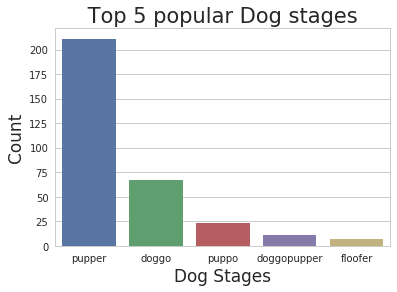

In [79]:
sns.set(style= 'whitegrid')
sorted_age = data['dog_stages'].value_counts().head(5).index
sns.countplot(data=data, x = 'dog_stages', order = sorted_age, orient='h')
plt.title(' Top 5 popular Dog stages ', fontsize=21)
plt.xlabel('Dog Stages', fontsize=17)
plt.ylabel('Count', fontsize=17)

#### Conclusion

from the above visualisation it is obvious that pupper is the most popular Dog stage, follwed by doggo.
 the Top 5 are pupper, doggo, puppo, doggopupper and floofer. 

### Limitations

1. There are lot of missing datas, hence the dataset may not reflect the complete truth.

### References

1. geekforgeek
2. datatofish.com
3. w3school.com
4. slackoverflow.com